In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
df=pd.read_csv('DataSet1.csv',encoding='latin1')

In [37]:
df.head()


,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22-05-2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14-03-2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15-08-2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16-03-2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28-06-2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Day of Week             608 non-null    object 
 1   Director                608 non-null    object 
 2   Genre                   608 non-null    object 
 3   Movie Title             608 non-null    object 
 4   Release Date            608 non-null    object 
 5   Studio                  608 non-null    object 
 6   Adjusted Gross ($mill)  608 non-null    object 
 7   Budget ($mill)          608 non-null    float64
 8   Gross ($mill)           608 non-null    object 
 9   IMDb Rating             608 non-null    float64
 10  MovieLens Rating        608 non-null    float64
 11  Overseas ($mill)        608 non-null    object 
 12  Overseas%               608 non-null    float64
 13  Profit ($mill)          608 non-null    object 
 14  Profit%                 608 non-null    fl

In [39]:
# Check for null values in each column
null_counts = df.isnull().sum()

# Display columns with null values and their respective counts
print("Columns with Null Values:")
print(null_counts)

Columns with Null Values:
Day of Week               0
Director                  0
Genre                     0
Movie Title               0
Release Date              0
Studio                    0
Adjusted Gross ($mill)    0
Budget ($mill)            0
Gross ($mill)             0
IMDb Rating               0
MovieLens Rating          0
Overseas ($mill)          0
Overseas%                 0
Profit ($mill)            0
Profit%                   0
Runtime (min)             0
US ($mill)                0
Gross % US                0
dtype: int64


In [40]:
df.describe()

,Budget ($mill),IMDb Rating,MovieLens Rating,Overseas%,Profit%,Runtime (min),US ($mill),Gross % US
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,92.467928,6.923849,3.340378,57.698849,719.278783,117.781250,167.135197,42.301151
std,59.421407,0.925890,0.454071,12.334237,1942.807248,23.179122,92.465903,12.334237
min,0.600000,3.600000,1.490000,17.200000,7.700000,30.000000,0.000000,0.000000
25%,45.000000,6.375000,3.037500,49.900000,201.850000,100.000000,106.950000,33.700000
50%,80.000000,6.900000,3.365000,58.200000,338.550000,116.000000,141.700000,41.800000
75%,130.000000,7.600000,3.672500,66.300000,650.100000,130.250000,202.100000,50.100000
max,300.000000,9.200000,4.500000,100.000000,41333.300000,238.000000,760.500000,82.800000


In [41]:
df.Genre.unique()

array(['action', 'comedy', 'adventure', 'horror', 'animation',
       'biography', 'drama', 'musical', 'sci-fi', 'crime', 'romance',
       'fantasy', 'mystery', 'thriller', 'documentary'], dtype=object)

In [42]:
#newSetMovies=df[(df.Studio == 'Fox') | (movies.Studio == 'WB') | ] 

studio_filter=['Buena Vista Studios','Fox','Paramount Pictures','Sony','Universal','WB']
newSetMovies=df[df.Studio.isin(studio_filter)]

In [43]:
newSetMovies.Studio.unique()

array(['Buena Vista Studios', 'Sony', 'Universal', 'Paramount Pictures',
       'WB', 'Fox'], dtype=object)

In [44]:
genre_filter =['action','adventure','animation','comedy','drama']
newSetMovies2=newSetMovies[newSetMovies.Genre.isin(genre_filter)]

In [45]:
newSetMovies2.Studio.unique()

array(['Buena Vista Studios', 'Sony', 'Universal', 'WB',
       'Paramount Pictures', 'Fox'], dtype=object)

In [46]:
newSetMovies2.Genre.unique()

array(['action', 'comedy', 'adventure', 'animation', 'drama'],
      dtype=object)

In [47]:
sns.set(style="darkgrid")

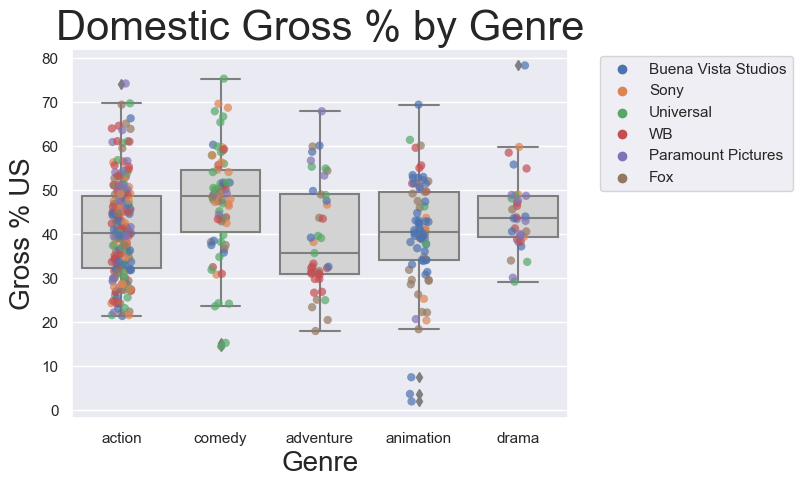

In [48]:
ax=sns.boxplot(data=newSetMovies2,x='Genre',y='Gross % US',orient='v',color='lightgray')
plt.setp(ax.artists,alpha=0.5)
sns.stripplot(x='Genre',y='Gross % US',data=newSetMovies2,hue='Studio',jitter=True,size=6,alpha=0.7)
ax.axes.set_title('Domestic Gross % by Genre',fontsize=30)
ax.set_xlabel('Genre',fontsize=20)
ax.set_ylabel('Gross % US',fontsize=20)
ax.legend(bbox_to_anchor=(1.05,1),loc=2)

In [ ]:
pip install sweetviz

In [ ]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset
advert_report = sv.analyze(df)
#display the report
advert_report.show_html('movies.html')

In [49]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Remove irrelevant columns
df.drop(['Day of Week', 'Studio'], axis=1, inplace=True)

# Convert 'Release Date' column to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Extract year from 'Release Date' column
df['Release Year'] = df['Release Date'].dt.year

# Drop 'Release Date' column after extracting year
df.drop('Release Date', axis=1, inplace=True)

# Replace any special characters or spaces in column names
df.columns = df.columns.str.replace(' ', '_')

# Check the cleaned dataset
print(df.head())

# Save the cleaned dataset


                  Director   Genre        Movie_Title Adjusted_Gross_($mill)  \
0                Brad Bird  action       Tomorrowland                  202.1   
1              Scott Waugh  action     Need for Speed                  204.2   
2           Patrick Hughes  action  The Expendables 3                  207.1   
3  Phil Lord, Chris Miller  comedy     21 Jump Street                  208.8   
4          Roland Emmerich  action   White House Down                  209.7   

   Budget_($mill) Gross_($mill)  IMDb_Rating  MovieLens_Rating  \
0           170.0         202.1          6.7              3.26   
1            66.0         203.3          6.6              2.97   
2           100.0         206.2          6.1              2.93   
3            42.0         201.6          7.2              3.62   
4           150.0         205.4          8.0              3.65   

  Overseas_($mill)  Overseas% Profit_($mill)  Profit%  Runtime_(min)  \
0            111.9       55.4           32.1     1

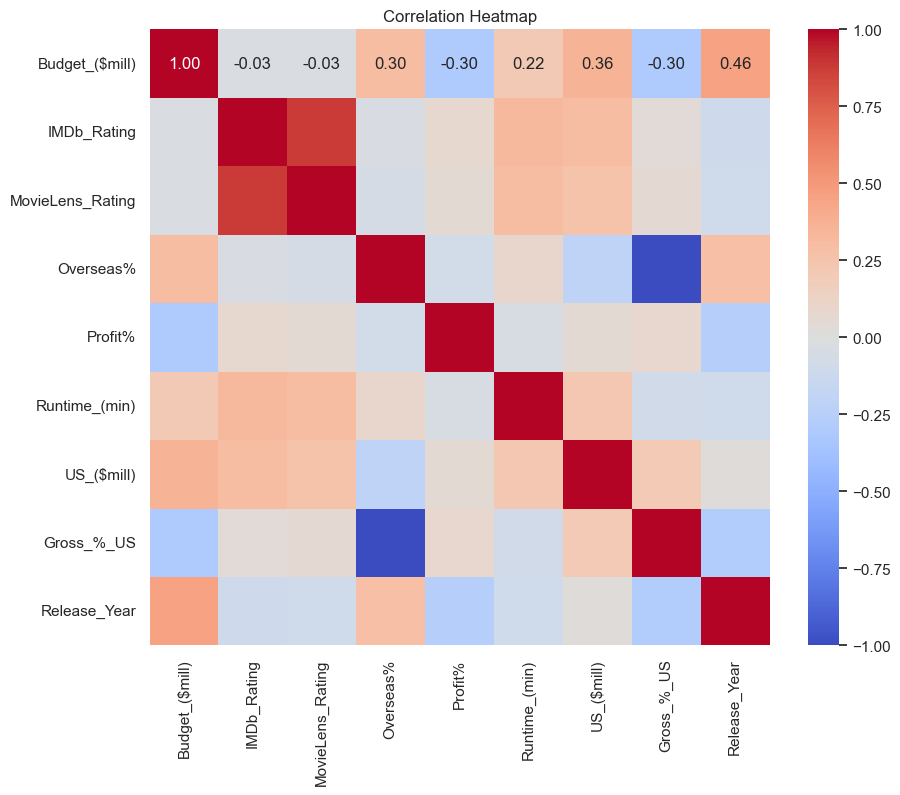

Selected features after correlation-based feature selection:
['Budget_($mill)', 'IMDb_Rating', 'Overseas%', 'Profit%', 'Runtime_(min)', 'US_($mill)', 'Release_Year']


In [50]:


# Exclude non-numeric columns from correlation calculation
numeric_data = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Set the threshold for feature selection based on correlation coefficient
threshold = 0.5

# Select features with correlation coefficient above the threshold
high_correlation_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_correlation_features.add(colname)

# Remove highly correlated features
selected_features = [feature for feature in numeric_data.columns if feature not in high_correlation_features]

# Display the selected features
print("Selected features after correlation-based feature selection:")
print(selected_features)


In [51]:
# features based on correlation matrix that is above 0.5
feature_corr = ['Budget_($mill)', 'Overseas%', 'Profit%', 'Runtime_(min)', 'US_($mill)', 'Release_Year']
train_data = df[feature_corr].copy()

In [52]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame containing features and labels

# Define features (X) and labels (y)
X = train_data   # Drop the target column from features
y = df['IMDb_Rating']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (486, 6)
Shape of X_test: (122, 6)
Shape of y_train: (486,)
Shape of y_test: (122,)


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have already loaded your dataset into a DataFrame called 'df'

# Define the features and target variable
features = ['Budget_($mill)', 'Overseas%', 'Profit%', 'Runtime_(min)', 'US_($mill)', 'Release_Year']
target = 'IMDb_Rating'  # Replace 'Target_Variable' with the name of your target variable

# Select the features and target variable from the DataFrame
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.6473198579552369
